In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle
import time
import os
import seaborn as sns
from datetime import datetime

In [2]:
sns.set_style("whitegrid")

In [3]:
log_dir = './logs/toy_digital'

In [4]:
with open('{}/ratios.pickle'.format(log_dir), 'rb') as fp:
    ratios = pickle.load(fp)

In [5]:
with open('{}/Mc_max.pickle'.format(log_dir), 'rb') as fp:
    Mc_max = pickle.load(fp)
with open('{}/Mc_min.pickle'.format(log_dir), 'rb') as fp:
    Mc_min = pickle.load(fp)
with open('{}/MOT_max.pickle'.format(log_dir), 'rb') as fp:
    MOT_max = pickle.load(fp)
with open('{}/MOT_min.pickle'.format(log_dir), 'rb') as fp:
    MOT_min = pickle.load(fp)

In [6]:
with open('{}/BCOT_max.pickle'.format(log_dir), 'rb') as fp:
    BCOT_max = pickle.load(fp)
with open('{}/BCOT_min.pickle'.format(log_dir), 'rb') as fp:
    BCOT_min = pickle.load(fp)

In [7]:
with open('{}/BCOT_ratios.pickle'.format(log_dir), 'rb') as fp:
    BCOT_ratios = pickle.load(fp)

In [8]:
BCOT_ratios - ratios

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -6.14092110e-16,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -3.53883589e-16,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -1.84574578e-15,
       -1.13797860e-15,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        8.32667268e-16,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -5.96744876e-14, -6.14092110e-16,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -4.85722573e-17,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -

In [9]:
ratios.shape

(81,)

In [10]:
size = ratios.shape[0]

In [11]:
(ratios<1).sum()

9

In [12]:
(ratios<1).sum()/size

0.1111111111111111

In [13]:
ratios

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.02040816, 1.        , 1.        ,
       1.        , 0.02040816, 1.        , 1.        , 1.        ,
       0.02040816, 0.23469388, 1.        , 1.        , 1.        ,
       0.23469388, 1.        , 1.        , 1.        , 0.23469388,
       0.02040816, 1.        , 1.        , 1.        , 0.02040816,
       1.        , 1.        , 1.        , 0.02040816, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

In [14]:
np.median(ratios)

1.0

In [15]:
np.mean(ratios)

0.8990929705215421

In [16]:
ratios.min()

0.020408163265306315

In [17]:
min_idx = np.argmin(ratios)

In [18]:
min_idx

49

In [19]:
cost = np.zeros(81)
cost[49] = 10000.0
cost = cost.reshape((3, 3, 3, 3))

In [20]:
np.where(cost>0)

(array([1], dtype=int64),
 array([2], dtype=int64),
 array([1], dtype=int64),
 array([1], dtype=int64))

In [21]:
# MOT_max = MOT_max.reshape(-1)
# MOT_min = MOT_min.reshape(-1)

In [22]:
MOT_max[min_idx], MOT_min[min_idx]

(300.0, 0.0)

In [23]:
# Mc_max = Mc_max.reshape(-1)
# Mc_min = Mc_min.reshape(-1)

In [24]:
Mc_max[min_idx], Mc_min[min_idx]

(61.224489795918366, 55.10204081632647)

In [25]:
res = pd.DataFrame({'Ratios': ratios})

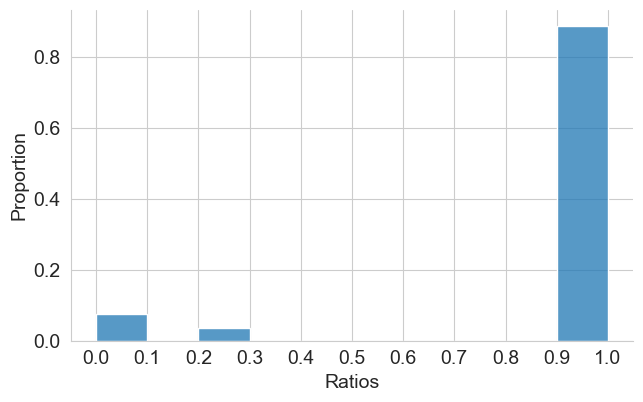

In [26]:
sns.displot(res['Ratios'], stat='probability', color='tab:blue', bins=np.linspace(0.0, 1.0, num=11),
            height=4, aspect=1.6) #bins=np.linspace(0.955, 1.0, num=10)
plt.xticks(np.linspace(0.0, 1.0, num=11), fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Ratios', fontsize = 14)
plt.ylabel('Proportion', fontsize = 14)
# plt.savefig('{}/{}_{}.pdf'.format(log_dir, ticker1, ticker2), format='pdf',
#             dpi=1000, bbox_inches='tight', pad_inches=0.1)
plt.show()